#Titanic EDA

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv('titanic.csv')

In [4]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


### Quienes eran los pasajeros en el titanic?

In [11]:
titanic_df = sns.load_dataset('titanic')

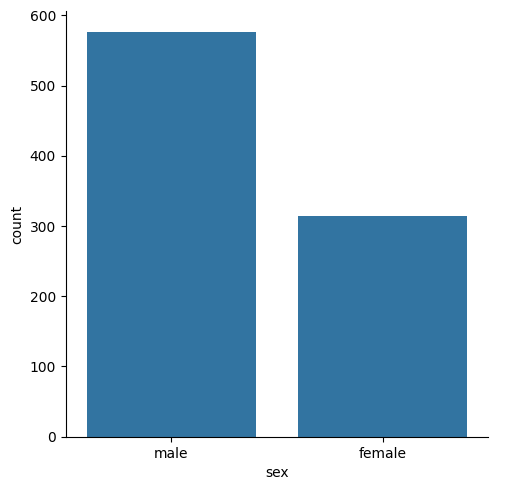

In [14]:
#Female / male
sns.catplot(x='sex', data=titanic_df, kind='count')

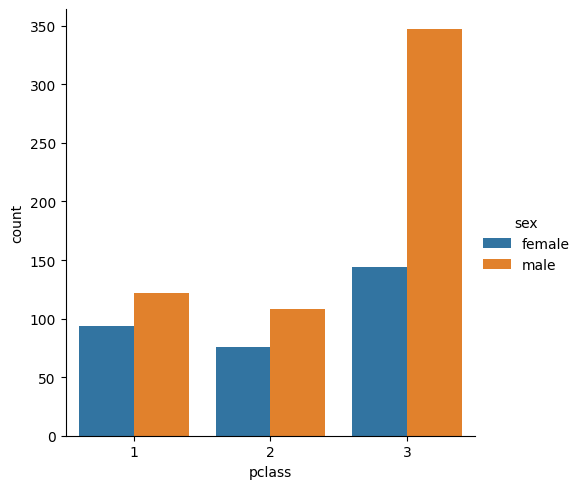

In [18]:
#Hombres y mujeres por clase
sns.catplot(x='pclass',data=titanic_df,hue='sex',kind='count')

In [20]:
#Man/woman or children
def man_wom_chi(passenger):
    age=passenger['age']
    sex=passenger['sex']

    return 'child' if age < 16 else sex

titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [21]:
titanic_df[0:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,male
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,male
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,female
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,child


In [22]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

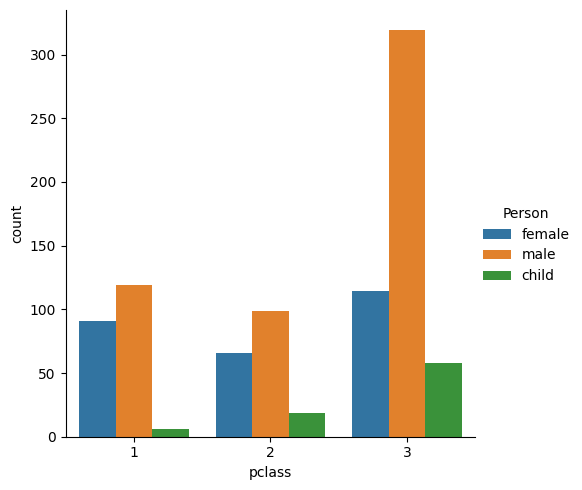

In [24]:
sns.catplot(x= 'pclass',data=titanic_df,hue='Person',kind='count')

<Axes: >

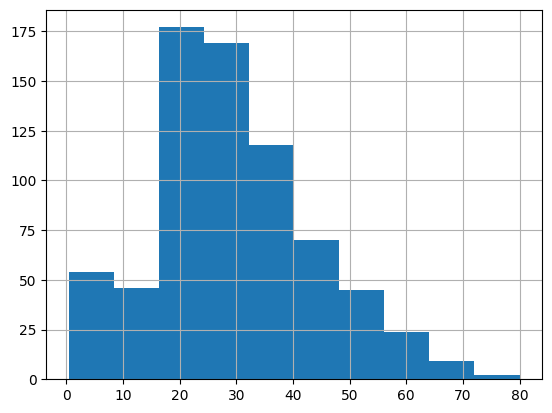

In [26]:
titanic_df['age'].hist()

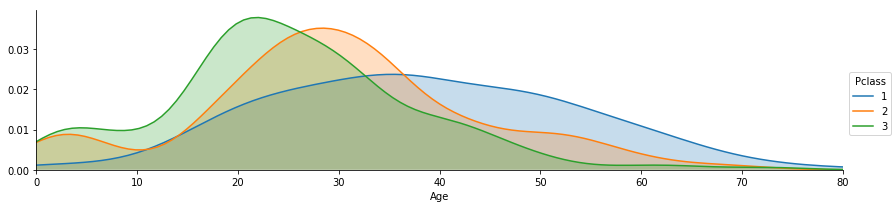

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

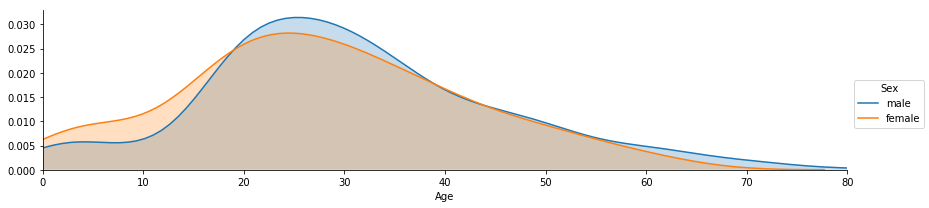

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

### En que cubierta esttaban los pasajeros y como se relaciona a la clase a la que pertenecen?

In [27]:
deck_df = titanic_df.dropna(axis=0)

In [28]:
deck_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,male
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,child
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,female


In [29]:
#Cubierta por nmero de cabina
def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

# get_level[deck_df.iloc[1]]

In [30]:
deck_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,male
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,child
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,female


### Quienes estaban con su familia?

> Indented block



In [31]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male


In [33]:
# Solos?
titanic_df['Alone'] = titanic_df['sibsp'] + titanic_df['parch']

In [34]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person,Alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male,0
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,female,0
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female,3
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male,0
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male,0


In [35]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Person,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,0


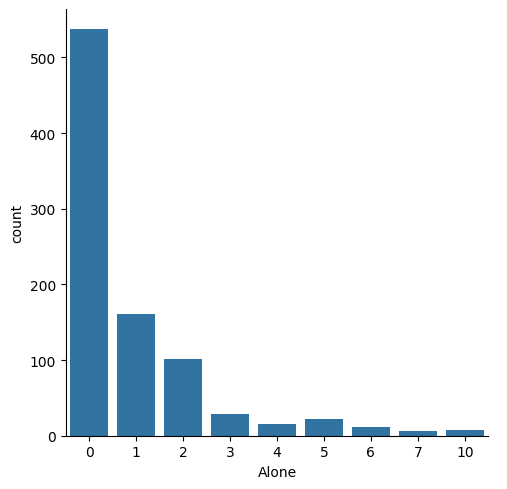

In [38]:
sns.catplot(x = 'Alone',data=titanic_df,kind='count')

### Porque sobrevivieron?  (Factores)

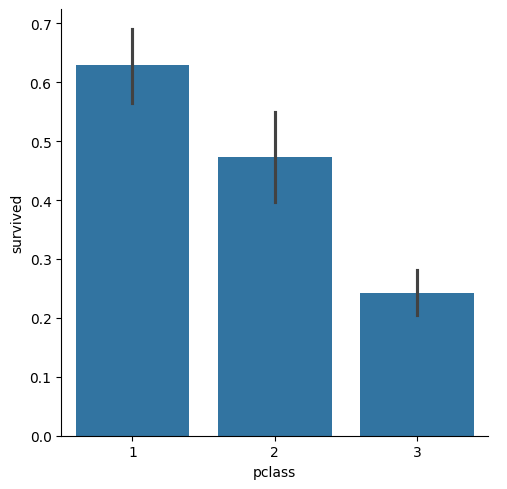

In [42]:
sns.catplot(x='pclass', y='survived', data=titanic_df, kind='bar')

Clase baja con menos probabilidades de sobrevivir

Sobrevivieron más mujeres que hombres?

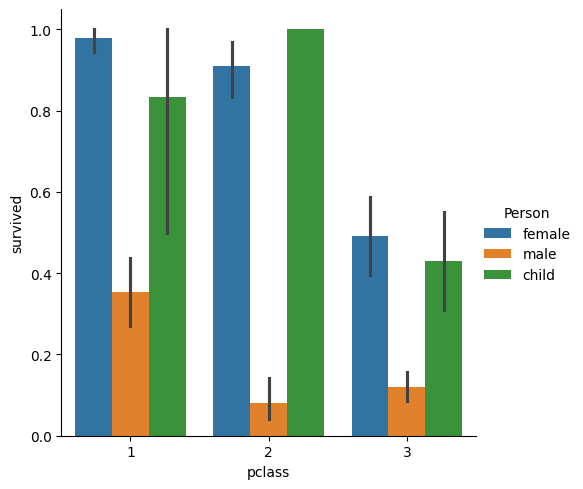

In [44]:
sns.catplot(x = 'pclass',y ='survived',hue='Person',data=titanic_df,kind='bar')

SOBREVIVIERON MÁS MUJERES Y NIÑOS  que hombres

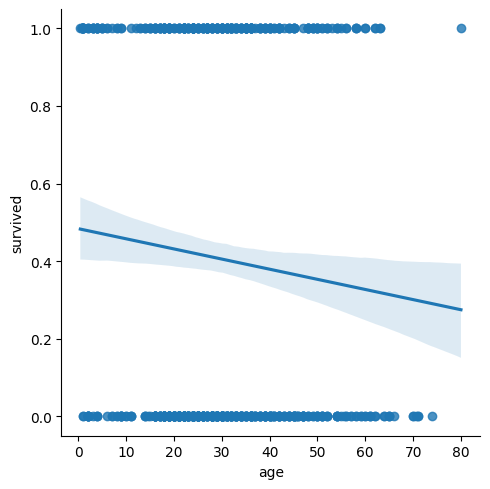

In [47]:
sns.lmplot(x ='age',y='survived',data=titanic_df)

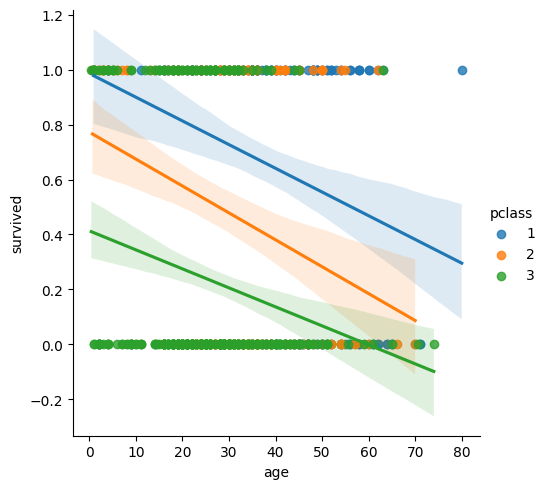

In [48]:
sns.lmplot(x='age',y='survived',hue='pclass',data=titanic_df)

Las personas de mayor edad tenía menos probabilidad de sobrevivir

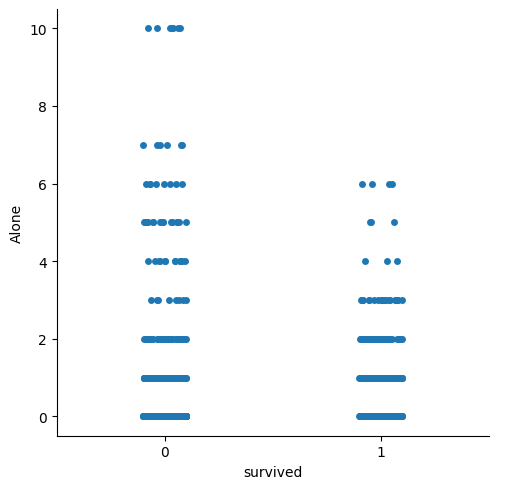

In [51]:
sns.catplot(x='survived',y='Alone',data=titanic_df)

Si conocía a alguien en el barco (conocido, familiar) se tenía más probabilidad de sobrevivir